### **Loading libraries**

In [1]:
#Import required libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Remove the limit from the number of displayed columns and rows. It helps to see the entire dataframe while printing it
pd.set_option("display.max_columns", None)
# pd.set_option('display.max_rows', None)
pd.set_option("display.max_rows", 200)

In [2]:
data = pd.read_csv("used_cars.csv")
# Remove S.No. column from data. Hint: Use inplace = True
data.drop(columns = ["S.No."], inplace = True)
data.head()
#Here, we would like to add another feature, "Age" based on the year of the car built
data['Current_year']=2021
data['Ageofcar']=data['Current_year']-data['Year']
data.drop('Current_year',axis=1,inplace=True)
data.head()
# Explore basic summary statistics of numeric variables. Hint: Use describe() method.
data.describe().T
data.info()
# Explore basic summary statistics of categorical variables. Hint: Use the argument include=['object'] 
data.describe(include='object')
cat_cols=data.select_dtypes(include=['object']).columns

for column in cat_cols:
    print("For column:",column)
    print(data[column].value_counts())
    print('-'*50)

#Sort the dataset in 'descending' order using the feature 'Kilometers_Driven'
data.sort_values('Kilometers_Driven', ascending=False).head(10)

# Removing the 'row' at index 2328 from the data. Hint: use the argument inplace=True
data.drop([2328], axis=0,inplace=True )

#Sort the dataset in 'ascending' order using the feature 'Mileage'
data.sort_values('Mileage', ascending=True).head(10)

data.query("Mileage  == 0")['Mileage'].count()
# We have to change these 0 values to Null Value so we can treat them later:
data.loc[data["Mileage"]==0.0,'Mileage']=np.nan
# We can check the same for other features as well, starting with Power:
data.query("Power  == 0")['Power'].count()
#check 0 value for Engine:
data.query("Engine  == 0")['Engine'].count()
data.query("Seats  == 0")['Seats'].count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_price          1006 non-null   float64
 12  Price              6019 non-null   float64
 13  Ageofcar           7253 non-null   int64  
dtypes: float64(6), int64(3), object(5)
memory usage: 793.4+ KB
For column: Name
Mahindra XUV500 W8 2WD                  55
M

0

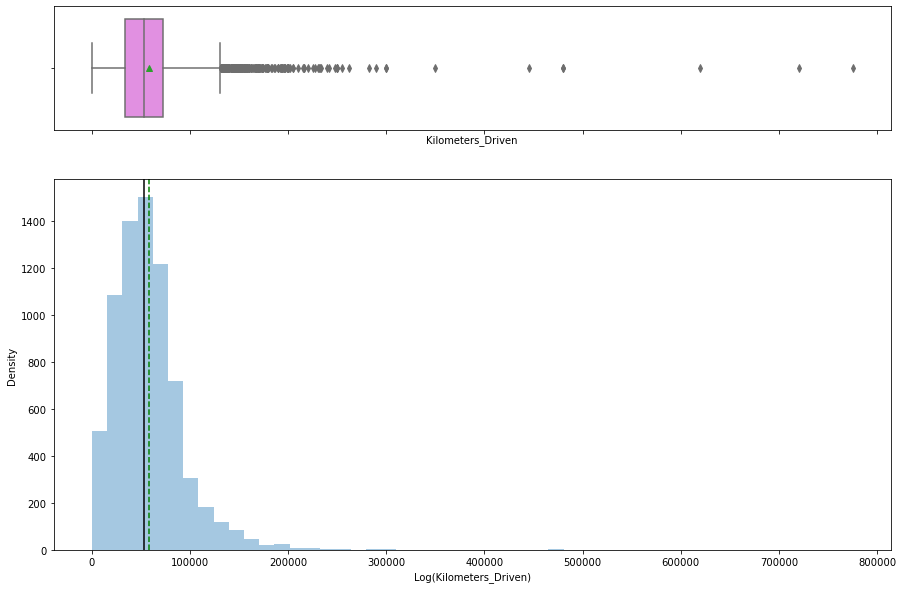

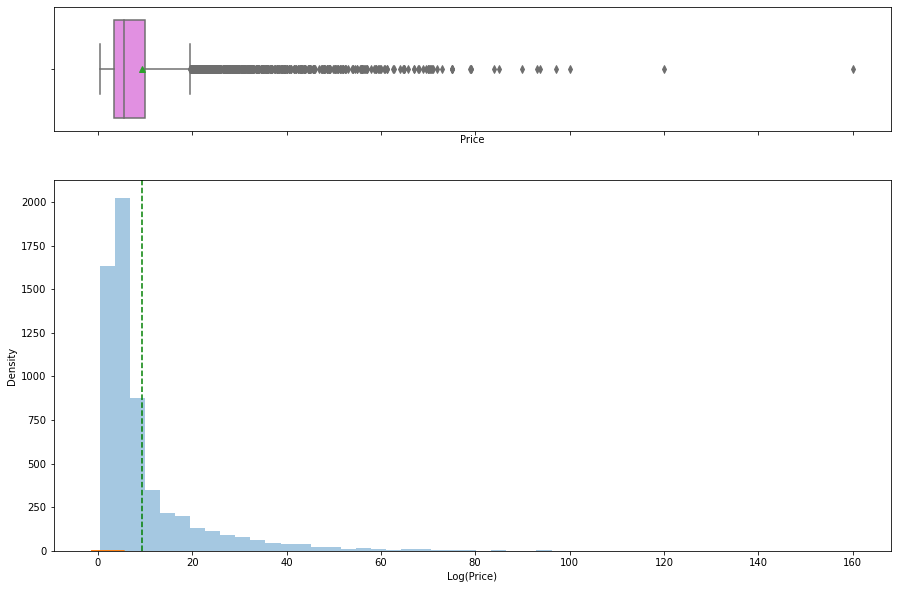

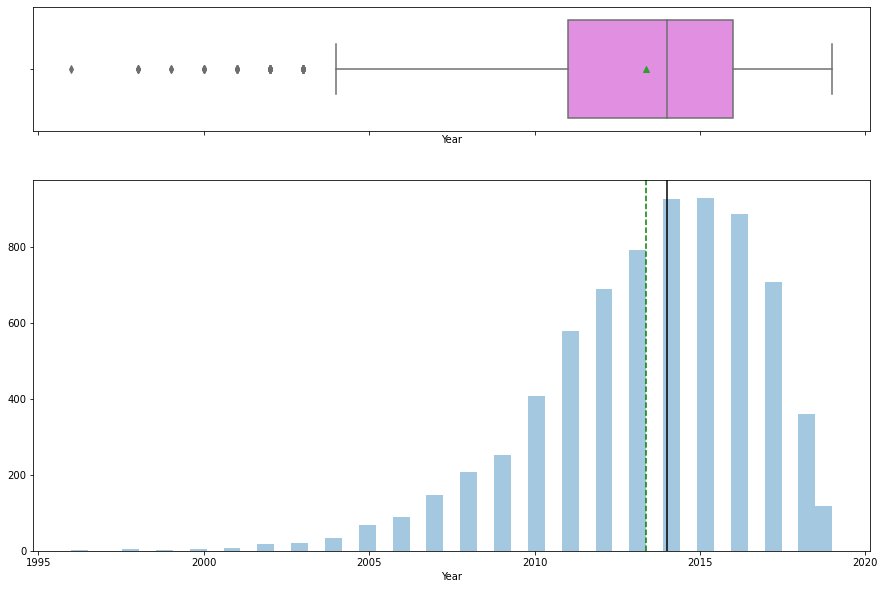

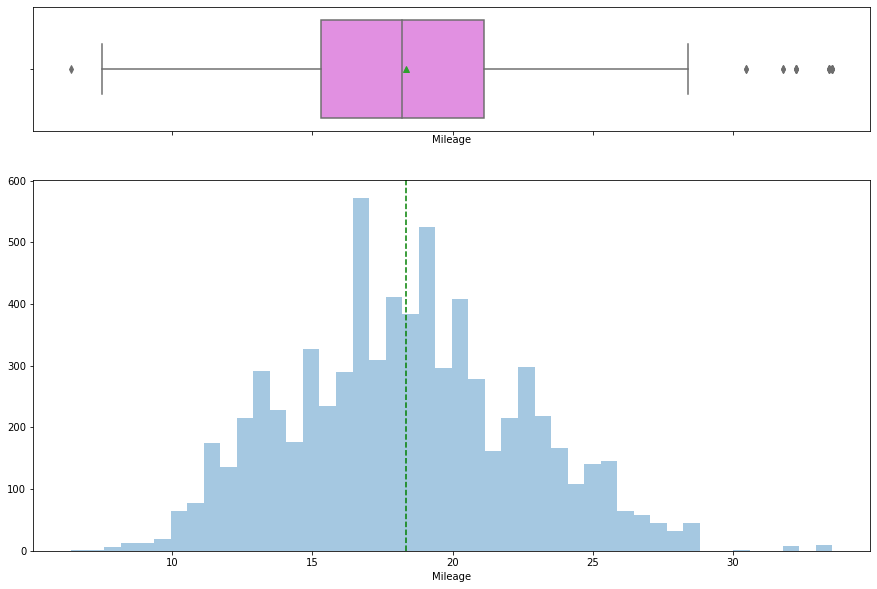

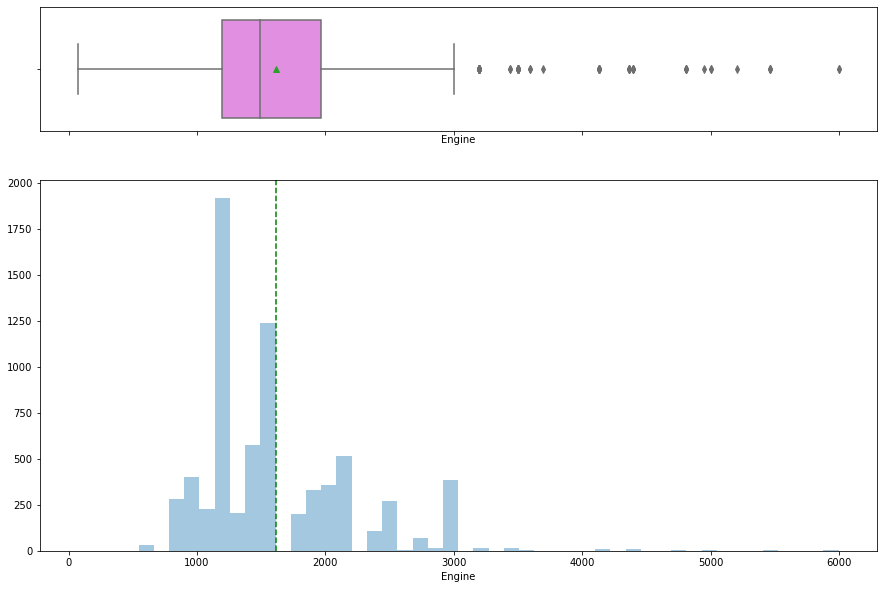

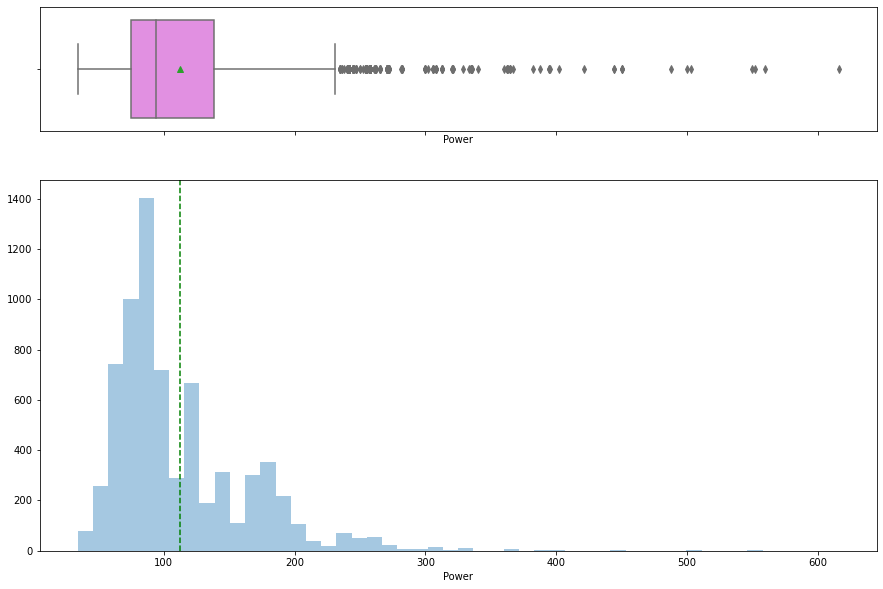

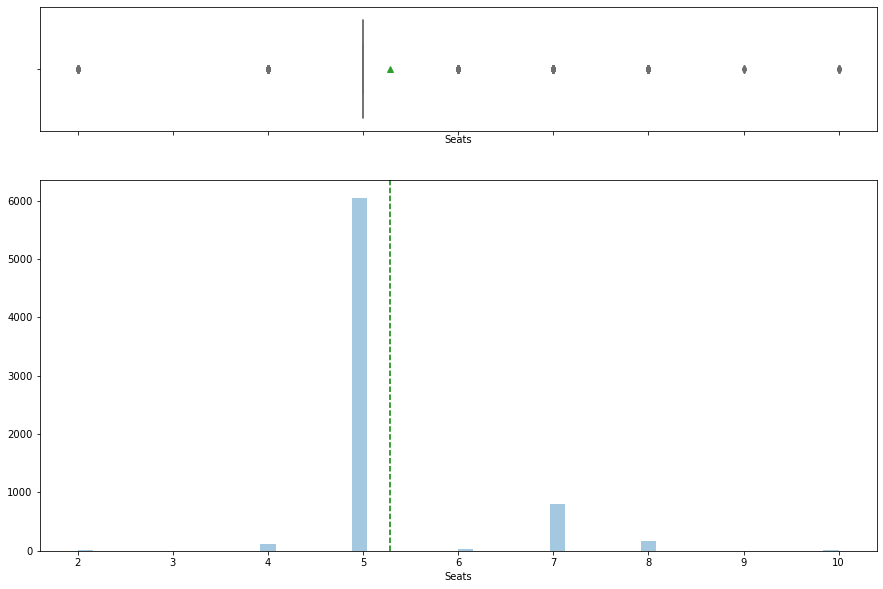

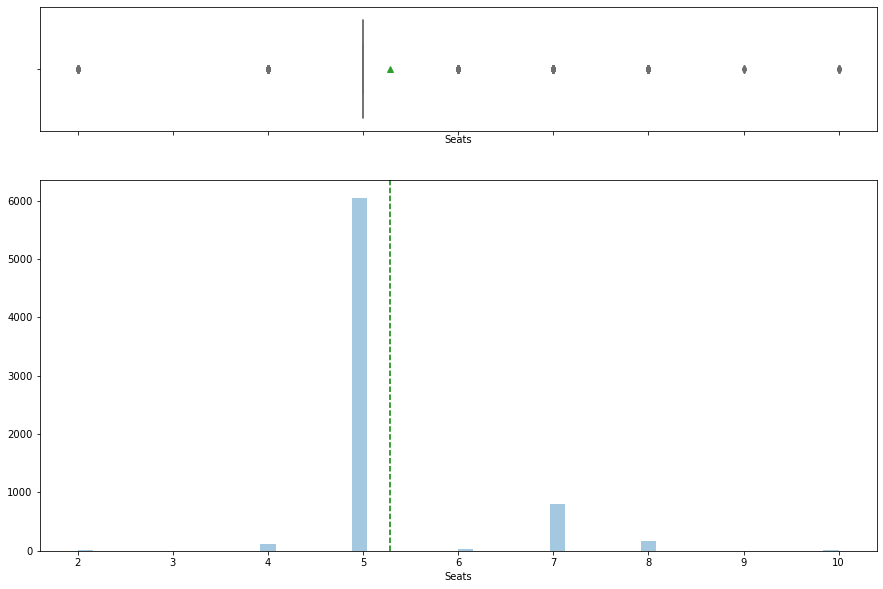

In [3]:
# Let us write a function that will help us create a boxplot and histogram for any input numerical variable.
# This function takes the numerical column as the input and returns the boxplots and histograms for the variable.

def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram
    
    
#Plot histogram and box-plot for 'Kilometers_Driven'
histogram_boxplot(data['Kilometers_Driven'])
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(np.log(data["Kilometers_Driven"]), axlabel="Log(Kilometers_Driven)");

### We can add a transformed kilometers_driven feature in data
data["kilometers_driven_log"] = np.log(data["Kilometers_Driven"])
# Plot histogram and box-plot for 'Price'
histogram_boxplot(data['Price'])
# Log transformation of the feature 'Price'
sns.distplot(np.log(data["Price"]), axlabel="Log(Price)");

# We can Add a transformed Price feature in data
data["price_log"] = np.log(data["Price"])
histogram_boxplot(data['Year'])

histogram_boxplot(data['Mileage'])
histogram_boxplot(data['Engine'])
histogram_boxplot(data['Power'])
histogram_boxplot(data['Seats'])
histogram_boxplot(data['Seats'])



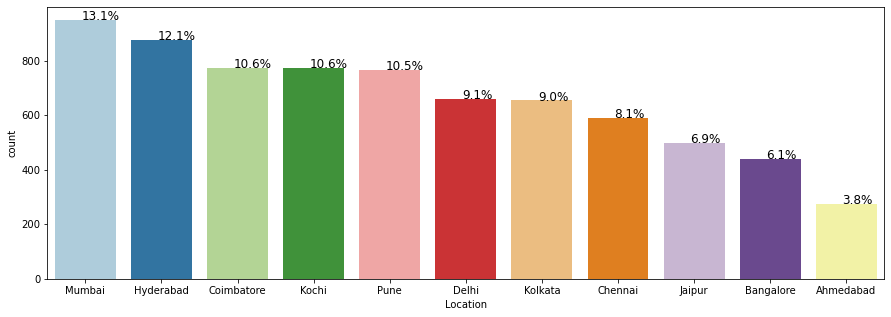

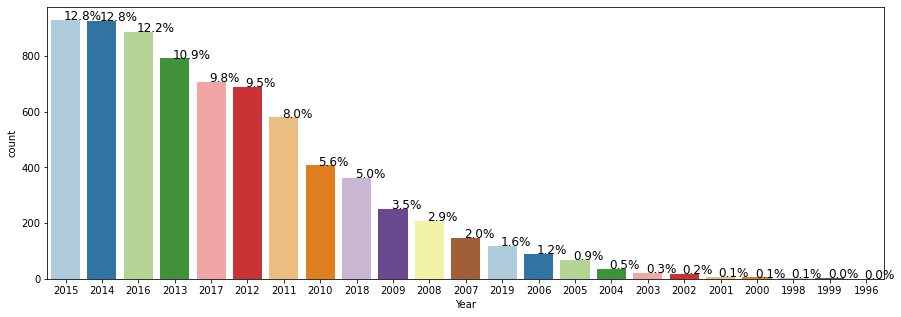

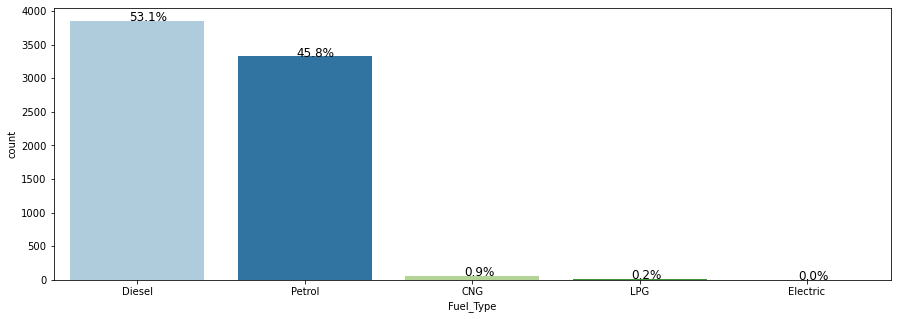

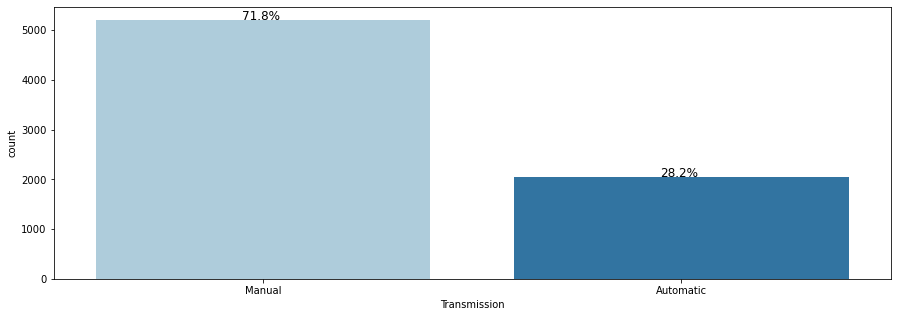

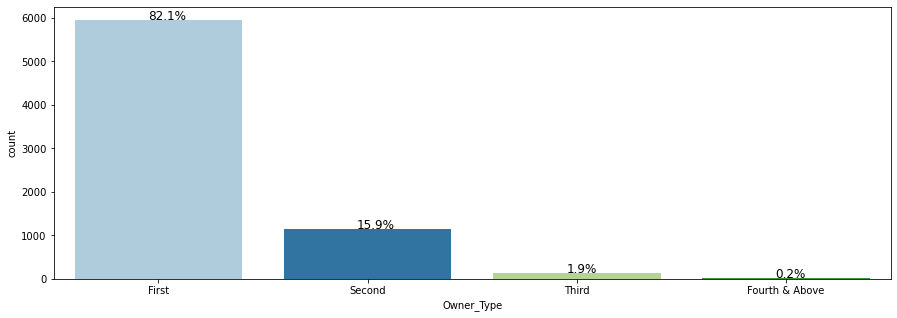

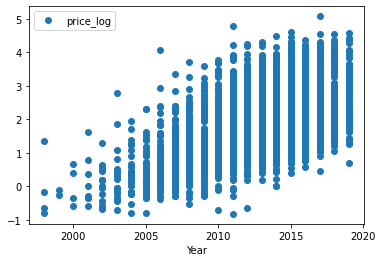

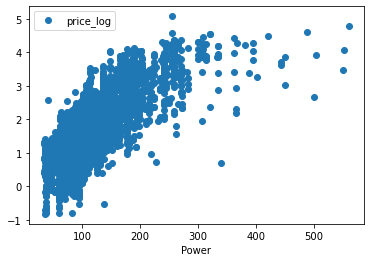

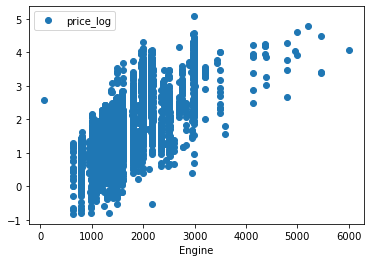

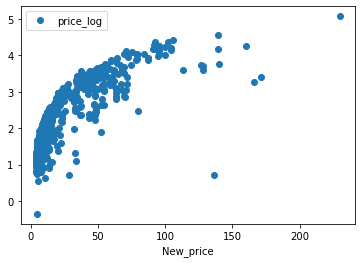

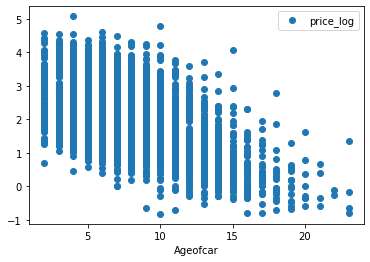

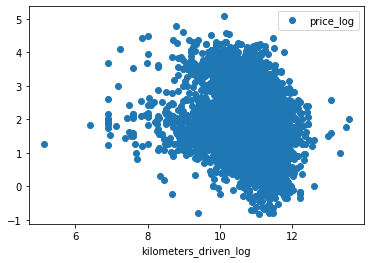

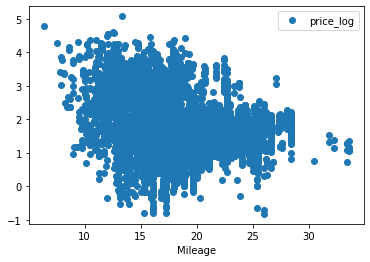

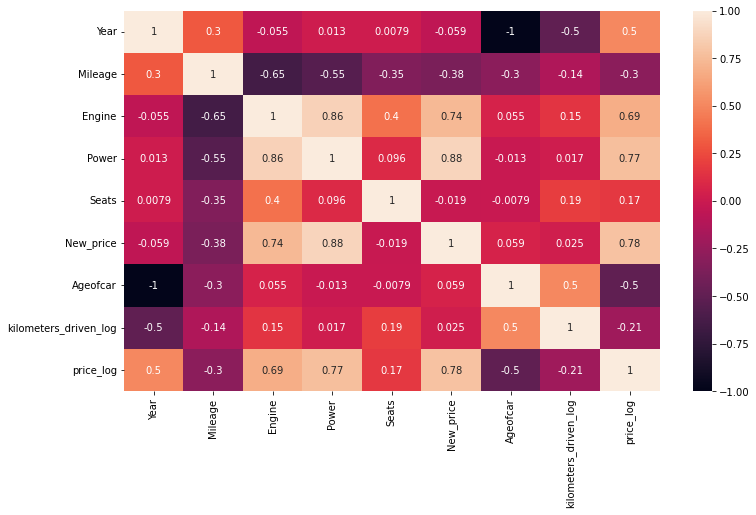

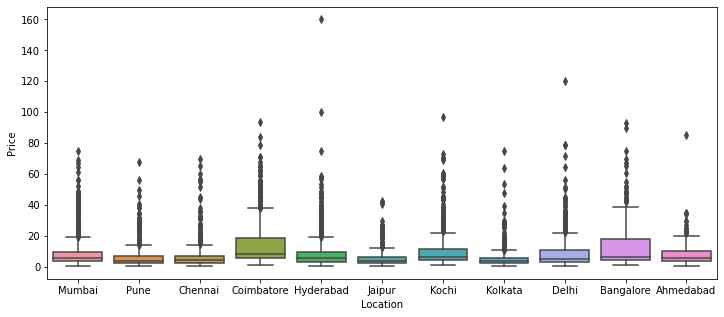

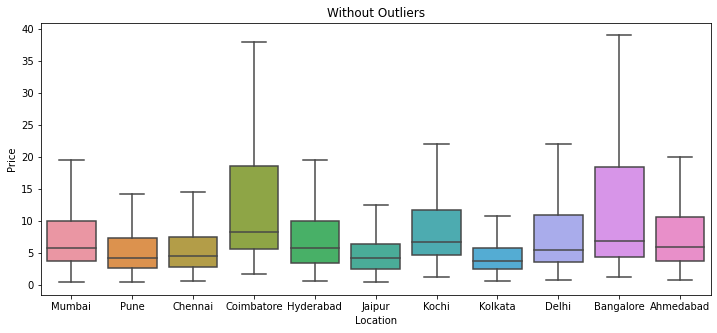

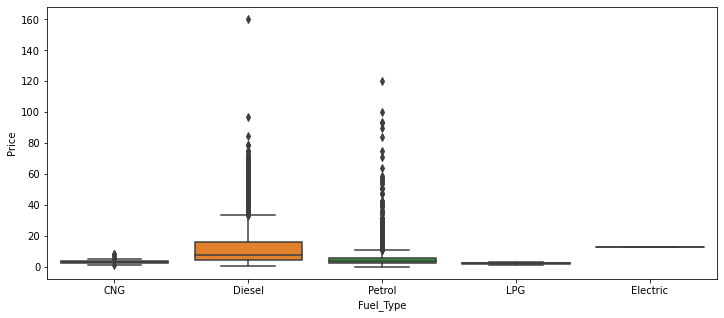

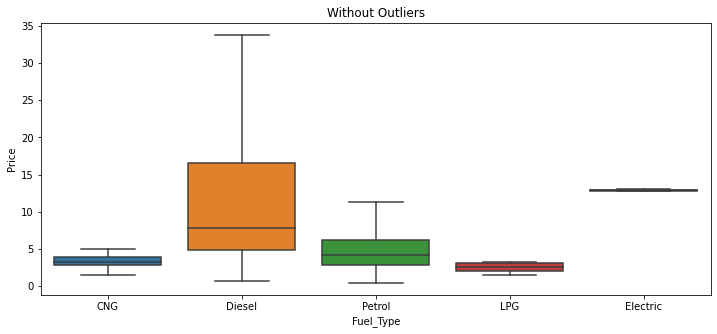

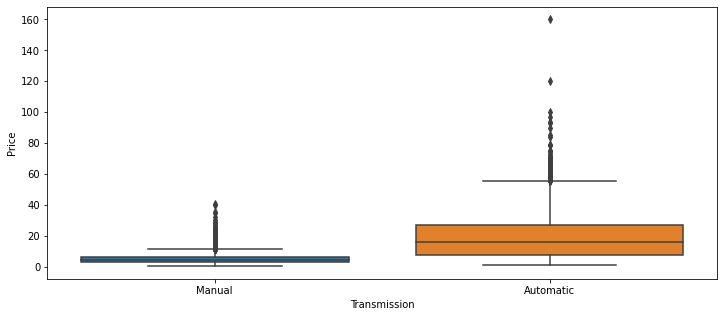

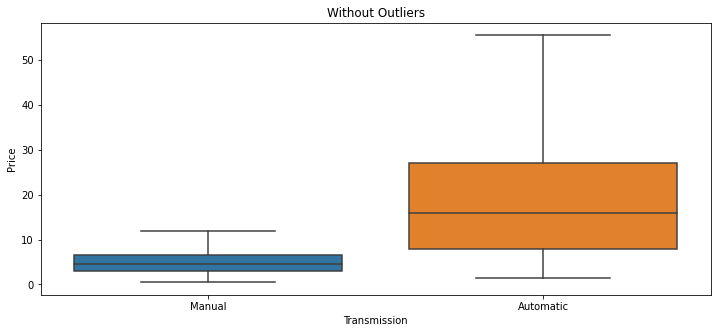

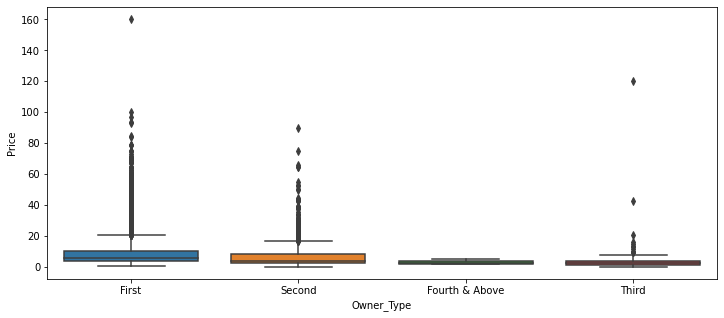

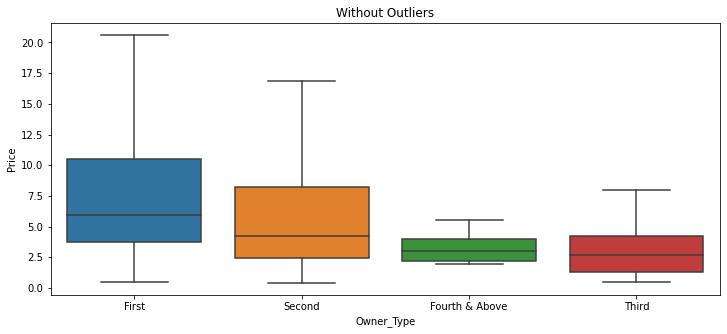

Model
SwiftDzire    189
Grandi10      179
WagonR        178
Innova2.5     145
Verna1.6      127
City1.5       122
Cityi         115
Creta1.6      110
NewC-Class    110
3Series       109
Name: Model, dtype: int64

In [4]:
# Let us write a function that will help us create barplots that indicate the percentage for each category.
# This function takes the categorical column as the input and returns the barplots for the variable.

def perc_on_bar(z):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''

    total = len(data[z]) # length of the column
    plt.figure(figsize=(15,5))
    ax = sns.countplot(data[z],palette='Paired',order = data[z].value_counts().index)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage 
    
    plt.show() # show the plot
    
#Bar Plot for 'Location'
perc_on_bar('Location')
perc_on_bar('Year')
perc_on_bar('Fuel_Type')
perc_on_bar('Transmission')
perc_on_bar('Owner_Type')
#Let us plot pair plot for the variables 'year' and 'price_log'
data.plot(x='Year', y='price_log', style='o')
data.plot(x='Power', y='price_log', style='o')
data.plot(x='Engine', y='price_log', style='o')
data.plot(x='New_price', y='price_log', style='o')
data.plot(x='Ageofcar', y='price_log', style='o')
data.plot(x='kilometers_driven_log', y='price_log', style='o')
data.plot(x='Mileage', y='price_log', style='o')
#sns.pairplot(data.drop(['Price','Kilometers_Driven'],axis=1))

#We can include the log transformation values and drop the original skewed data columns
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Price','Kilometers_Driven'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

# Let us write a function that will help us create boxplot w.r.t Price for any input categorical variable.
# This function takes the categorical column as the input and returns the boxplots for the variable.
def boxplot(z):
    plt.figure(figsize=(12, 5)) #setting size of boxplot
    sns.boxplot(x=z, y=data['Price']) # defining x and y
    plt.show()
    plt.figure(figsize=(12, 5))
    plt.title('Without Outliers')
    sns.boxplot(x=z, y=data['Price'],showfliers=False) #turning off the outliers
    plt.show()
    
#Box Plot:Price vs Location
boxplot(data['Location'])
boxplot(data['Fuel_Type'])
boxplot(data['Transmission'])
boxplot(data['Owner_Type'])

# We should separate Brand Name from the Name
data['Brand'] = data['Name'].str.split(' ').str[0]
data['Model'] = data['Name'].str.split(' ').str[1] + data['Name'].str.split(' ').str[2]
data.head()

data.Brand.unique()

#from here, we can see some brands are either the same but written differently such as ISUZU and Isuzu which should be the same, 
#and some are not complete, such as mini cooper which shows mini or land rover which shows land
IncompleteCol=['ISUZU','Isuzu','Mini','Land']
#correcting brand names
data[data.Brand.isin(IncompleteCol)].sample(10)

#Here we will change those brand names:
data.loc[data.Brand == 'ISUZU','Brand']='Isuzu'
data.loc[data.Brand=='Mini','Brand']='Mini Cooper'
data.loc[data.Brand=='Land','Brand']='Land Rover'
data.Brand.nunique()
data.groupby(data.Brand).size().sort_values(ascending =False)

data.Model.isnull().sum()
#There is one car in the dataset with null value in the Model which we will have to drop it:
data.dropna(subset=['Model'],axis=0,inplace=True)
data.Model.nunique()

data.groupby('Model')['Model'].size().nlargest(10)



In [5]:
# Now check the missing values of each column. Hint: Use isnull() method
data.isnull().sum()
#We can check to see how many missing values per row are there for each variable
num_missing = data.isnull().sum(axis=1)
num_missing.value_counts()
for n in num_missing.value_counts().sort_index().index:
    if n > 0:
        print("*" *30,f'\nFor the rows with exactly {n} missing values, NAs are found in:')
        n_miss_per_col = data[num_missing == n].isnull().sum()
        print(n_miss_per_col[n_miss_per_col > 0])
        print('\n\n')
        
#We start with the highest missing value to figure out what to do:
data[num_missing==7]



#Now we will be using the combination of Brand and Model and use median of that number to fill in the missing values for Seats
data['Seats'] = data['Seats'].fillna(data.groupby('Name')['Seats'].transform('median'))
data['Seats'].isnull().sum()
data['Seats'] = data['Seats'].fillna(data.groupby('Model')['Seats'].transform('median'))
data['Seats'].isnull().sum()
#There are 22 left and most of the cars are 5 seaters. Therefore, we fill in the rest of them with 5
data['Seats']=data['Seats'].fillna(5)

# Impute missing Mileage. For example use can use median or any other methods.
data['Mileage'] = data['Mileage'].fillna(data.groupby('Name')['Mileage'].transform('median'))
data['Mileage'] = data['Mileage'].fillna(data.groupby(['Brand','Model'])['Mileage'].transform('median'))
data['Mileage'].isnull().sum()
# Now check total number of missing values of the seat column to verify if they are imputed or not. Hint: Use isnull() method
data.isnull().sum()
# For Engine, we can use Brand and Mdodel first
data['Engine'] = data['Engine'].fillna(data.groupby('Name')['Engine'].transform('median'))
data['Engine'] = data['Engine'].fillna(data.groupby(['Brand','Model'])['Engine'].transform('median'))
data['Engine'].isnull().sum()
data.isnull().sum()
# For Power also,, we can use Brand and Mdodel first
data['Power'] = data['Power'].fillna(data.groupby('Name')['Power'].transform('median'))
data['Power'] = data['Power'].fillna(data.groupby(['Brand','Model'])['Power'].transform('median'))
data['Power'].isnull().sum()
data.New_price.isnull().sum()
#First we will use the Name and remove some of the missing data:
data['New_price'] = data['New_price'].fillna(data.groupby('Name')['New_price'].transform('median'))
data.New_price.isnull().sum()
data['New_price'] = data['New_price'].fillna(data.groupby(['Brand','Model'])['New_price'].transform('median'))
data.New_price.isnull().sum()
#Just based on the brand now:
data['New_price'] = data['New_price'].fillna(data.groupby('Brand')['New_price'].transform('median'))
data.New_price.isnull().sum()
#Now that we have filled in the values as much as possible, we will see how many is left:
data.isnull().sum()
#Now we can fill in the Engine, Power, and Mileage with their median values for the missing data
data['Mileage'] = data['Mileage'].fillna(data['Mileage'].median())
data['Power'] = data['Power'].fillna(data['Power'].median())
data['Engine'] = data['Engine'].fillna(data['Engine'].median())
#Now we will drop the remaining null values, whatever is left:
data.dropna(inplace=True,axis=0)
data.isnull().sum()


****************************** 
For the rows with exactly 1 missing values, NAs are found in:
Mileage         5
New_price    5024
dtype: int64



****************************** 
For the rows with exactly 2 missing values, NAs are found in:
Mileage       25
Power         75
Seats          1
New_price    101
Price        182
price_log    182
dtype: int64



****************************** 
For the rows with exactly 3 missing values, NAs are found in:
Mileage        29
Power          32
Seats           5
New_price    1045
Price        1012
price_log    1012
dtype: int64



****************************** 
For the rows with exactly 4 missing values, NAs are found in:
Mileage       6
Engine       25
Power        42
Seats        25
New_price    48
Price        23
price_log    23
dtype: int64



****************************** 
For the rows with exactly 5 missing values, NAs are found in:
Mileage      17
Engine       11
Power        16
Seats        12
New_price    17
Price         6
price_log   

Name                     0
Location                 0
Year                     0
Kilometers_Driven        0
Fuel_Type                0
Transmission             0
Owner_Type               0
Mileage                  0
Engine                   0
Power                    0
Seats                    0
New_price                0
Price                    0
Ageofcar                 0
kilometers_driven_log    0
price_log                0
Brand                    0
Model                    0
dtype: int64

In [6]:
# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import sklearn.metrics as metrics

import warnings
warnings.filterwarnings("ignore")

# Step-1
cars_data = data
X = cars_data.drop(['Name','Price','price_log','Kilometers_Driven','Year'],axis=1)
y = cars_data[["price_log", "Price"]]
X.head()
# Step-2 Use pd.get_dummies(drop_first=True)
X = pd.get_dummies(X,drop_first=True)
# Step-3 Splitting data into training and test set:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


# Let us write a function for calculating r2_score and RMSE on train and test data.
# This function takes model as an input on which we have trained particular algorithm.
#the categorical column as the input and returns the boxplots and histograms for the variable.

def get_model_score(model, flag=True):
    '''
    model : regressor to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    pred_train = model.predict(X_train)
    pred_train_ = np.exp(pred_train)
    pred_test = model.predict(X_test)
    pred_test_ = np.exp(pred_test)
    
    train_r2=metrics.r2_score(y_train['Price'],pred_train_)
    test_r2=metrics.r2_score(y_test['Price'],pred_test_)
    train_rmse=metrics.mean_squared_error(y_train['Price'],pred_train_,squared=False)
    test_rmse=metrics.mean_squared_error(y_test['Price'],pred_test_,squared=False)
    
    #Adding all scores in the list
    score_list.extend((train_r2,test_r2,train_rmse,test_rmse))
    
    # If the flag is set to True then only the following print statements will be dispayed, the default value is True
    if flag==True: 
        print("R-sqaure on training set : ",metrics.r2_score(y_train['Price'],pred_train_))
        print("R-square on test set : ",metrics.r2_score(y_test['Price'],pred_test_))
        print("RMSE on training set : ",np.sqrt(metrics.mean_squared_error(y_train['Price'],pred_train_)))
        print("RMSE on test set : ",np.sqrt(metrics.mean_squared_error(y_test['Price'],pred_test_)))
    
    # returning the list with train and test scores
    return score_list


### **Random Forest**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [7]:
# import Randomforest for Regression from sklearn
from sklearn.ensemble import RandomForestRegressor
# Now we can increase the number of trees from 20 to 200:
regressor4 = RandomForestRegressor(n_estimators=200, random_state=1)
regressor4.fit(X_train, y_train["price_log"])
y_pred4 = regressor4.predict(X_test)
print(regressor4.get_params())
print(pd.DataFrame(regressor4.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}
                            Imp
New_price              0.550715
Ageofcar               0.215178
Power                  0.142827
Engine                 0.019481
kilometers_driven_log  0.012162
Mileage                0.007457
Location_Kolkata       0.004088
Brand_Tata             0.003789
Model_CayenneBase      0.003348
Location_Hyderabad     0.003098


In [8]:
get_model_score(regressor4)

R-sqaure on training set :  0.9841611846509982
R-square on test set :  0.9422919556346615
RMSE on training set :  1.4417703024225168
RMSE on test set :  2.4969087551121927


[0.9841611846509982,
 0.9422919556346615,
 1.4417703024225168,
 2.4969087551121927]

### **Hyperparameter Tuning: Random Forest**

In [13]:
# Choose the type of Regressor. 
regressor_tuned = RandomForestRegressor(random_state=1)

# Define the parameters for Grid to choose from 
# Check documentation for all the parametrs that the model takes and play with those

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
parameters = {
    'bootstrap': [True],
    'max_depth': [None],
    'max_features': ['auto', 10,20],
    'min_impurity_decrease': [0.0,0.5,2],
    'min_samples_leaf': [1, 3, 5, 10],
    'min_samples_split': [1 ,2,3, 5],
    'oob_score': [False],
    'n_estimators': [200,1000,1500,2000]
}

scorer=metrics.make_scorer(metrics.r2_score)

grid_obj = GridSearchCV(regressor_tuned,param_grid=parameters,scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train,y_train['price_log'])


regressor_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
result = regressor_tuned.fit(X_train, y_train['price_log'])



print('grid_search.best_params_ are: \n' ,grid_search.best_params_)

print('Best Score is: \n', grid_search.best_score_)

print('result parameters: \n',result.get_params())

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [ ]:
print(result.get_params())
print(get_model_score(result))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor_tuned_best = RandomForestRegressor(random_state=1,bootstrap= True, max_depth=None, max_features= 'auto', min_impurity_decrease=0.0, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 2000, oob_score= False)
regressor_tuned_best.fit(X_train, y_train["price_log"])
y_pred_RF_Tuned = regressor_tuned_best.predict(X_test)
get_model_score(regressor_tuned_best)

**Feature Importance**

In [ ]:
# Print important features of tuned decision tree similar to decision trees
print (pd.DataFrame(regressor_tuned_best.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False).head(10))

In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y_test['price_log'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_RF_Tuned, color="b", hist=False, label="Prediction" , ax=ax)


plt.title('Actual vs Prediction for Used Car Sales Price')


plt.show()
plt.close()

In [ ]:
df=pd.DataFrame({'Actual':y_test['price_log'], 'Predicted':y_pred_RF_Tuned})
df

In [ ]:
index = np.arange(0,len(y_test['price_log']))
fig, ax = plt.subplots(1,1,figsize=(20,10))
plt.plot(index,y_test['price_log'], label = 'Actual Value')
plt.plot(index,y_pred_RF_Tuned, label = 'Predicted Value')
plt.title('Actual Value vs Predicted Val')
plt.xlabel('Index')
plt.ylabel('Usde Car Price Log')
plt.legend()